# Study of Glassdoor Data

The purpose of this study is too quickly present the Glassdoor data with the different attributes 

The datasets have been cleaned with cleaning functions written in python 

We will after studied missing data siginification 

## Import packages and constants and helpers 

In [13]:
# Packages 
import pandas as pd 
from autoc import DataExploration

%pylab inline --no-import
import pylab as pl
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Seaborn options 
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})
plt.style.use('ggplot') # ggplot2 style for mathplotlib 

# path to cleaned datasets 
path_reviews_cleaned = '~/Google Drive/Auto_clean/Datasets/Glassdoor/'


Populating the interactive namespace from numpy and matplotlib


## Glassdoor Cleaned  Reviews Data

### Quick Exploration 

In [40]:
df_reviews = pd.read_csv(path_reviews_cleaned + 'glassdoor_reviews_cleaned_utf8_170415.csv')

In [41]:
df_reviews.head()

,website,interview_difficulty,ceo_name,nb_c_jobs,company_description,registered_employer,benefits_below,similar_companies,acquired_by,founded,...,awards,ceo_rating,type,industry,operated_by,headquarters_city,headquarters_state,nb_awards_after_2000,has_website,ticker
0,www.target.com,2.8,Brian Cornell,NaN,From our Minneapolis-based headquarters to ove...,Engaged Employer,NaN,"Walmart,The Home Depot,Walgreens,Macy's,Bank o...",NaN,1962,...,"Best Companies for Hourly Workers,Working Moth...",66,Company - Public with Ticker,Retail,NaN,Minneapolis,MN,2,1,TGT
1,www.homedepot.com,2.3,Craig Menear,1700,NaN,Engaged Employer,NaN,NaN,NaN,1978,...,"World's Most Admired Companies of 2013,Fortune...",80,Company - Public with Ticker,Retail,NaN,Atlanta,GA,6,1,HD
2,www.army.mil,2.3,John McHugh,NaN,The US Department of the Army has its marching...,Engaged Employer,NaN,"Walmart,US Navy,The Home Depot,UPS,Bank of Ame...",NaN,1775,...,"Best Places to Work for Commuters,National Cen...",77,Government,Government,NaN,Washington,DC,2,1,NaN
3,www.att.com,2.7,Randall L. Stephenson,2100,We understand that our customers want an easie...,NaN,NaN,NaN,NaN,1876,...,"Happiest Companies for Young Professionals,For...",71,Company - Public with Ticker,Telecommunications,NaN,Dallas,TX,5,1,T
4,www.bestbuy.com,2.4,Hubert Joly,NaN,The biggest consumer electronics outlet in the...,Engaged Employer,NaN,"Walmart,The Home Depot,AT&T,Lowe's,Target,Bank...",NaN,1966,...,"Employees’ Choice -50 Best Places to Work,Glas...",74,Company - Public with Ticker,Retail,NaN,Richfield,MN,2,1,BBY


In [43]:
df_reviews[df_reviews.company_name == 'Google'].iloc[0]

website                                                      www.google.com
interview_difficulty                                                    3.4
ceo_name                                                         Larry Page
nb_c_jobs                                                               NaN
company_description       Google is not a conventional company, and we d...
registered_employer                                        Engaged Employer
benefits_below                                                          NaN
similar_companies         Facebook,Amazon.com,IBM,Apple,Microsoft,Cisco ...
acquired_by                                                             NaN
founded                                                                1998
affiliated_company        YouTube,Nest,Motorola Mobility,Wildfire Intera...
nb_ratings_ceo                                                         1777
stars                                                                   4.4
nb_c_reviews

In [44]:
df_reviews[df_reviews.company_name == 'Dataiku'] # too bad (dataset too old)

,website,interview_difficulty,ceo_name,nb_c_jobs,company_description,registered_employer,benefits_below,similar_companies,acquired_by,founded,...,awards,ceo_rating,type,industry,operated_by,headquarters_city,headquarters_state,nb_awards_after_2000,has_website,ticker


In [45]:
df_reviews[df_reviews.company_name == 'Uber'].iloc[0]['url']

'http://www.glassdoor.com/Overview/Working-at-Uber-EI_IE575263.11,15.htm'

In [46]:
df_reviews.columns

Index([u'website', u'interview_difficulty', u'ceo_name', u'nb_c_jobs',
       u'company_description', u'registered_employer', u'benefits_below',
       u'similar_companies', u'acquired_by', u'founded', u'affiliated_company',
       u'nb_ratings_ceo', u'stars', u'nb_c_reviews_detailled', u'size',
       u'nb_c_interviews', u'friend_recommend', u'url', u'benefits_above',
       u'employer_id', u'revenue', u'headquarters', u'competitors',
       u'company_name', u'nb_c_salaries', u'awards', u'ceo_rating', u'type',
       u'industry', u'operated_by', u'headquarters_city',
       u'headquarters_state', u'nb_awards_after_2000', u'has_website',
       u'ticker'],
      dtype='object')

In [47]:
df_reviews.head()

,website,interview_difficulty,ceo_name,nb_c_jobs,company_description,registered_employer,benefits_below,similar_companies,acquired_by,founded,...,awards,ceo_rating,type,industry,operated_by,headquarters_city,headquarters_state,nb_awards_after_2000,has_website,ticker
0,www.target.com,2.8,Brian Cornell,NaN,From our Minneapolis-based headquarters to ove...,Engaged Employer,NaN,"Walmart,The Home Depot,Walgreens,Macy's,Bank o...",NaN,1962,...,"Best Companies for Hourly Workers,Working Moth...",66,Company - Public with Ticker,Retail,NaN,Minneapolis,MN,2,1,TGT
1,www.homedepot.com,2.3,Craig Menear,1700,NaN,Engaged Employer,NaN,NaN,NaN,1978,...,"World's Most Admired Companies of 2013,Fortune...",80,Company - Public with Ticker,Retail,NaN,Atlanta,GA,6,1,HD
2,www.army.mil,2.3,John McHugh,NaN,The US Department of the Army has its marching...,Engaged Employer,NaN,"Walmart,US Navy,The Home Depot,UPS,Bank of Ame...",NaN,1775,...,"Best Places to Work for Commuters,National Cen...",77,Government,Government,NaN,Washington,DC,2,1,NaN
3,www.att.com,2.7,Randall L. Stephenson,2100,We understand that our customers want an easie...,NaN,NaN,NaN,NaN,1876,...,"Happiest Companies for Young Professionals,For...",71,Company - Public with Ticker,Telecommunications,NaN,Dallas,TX,5,1,T
4,www.bestbuy.com,2.4,Hubert Joly,NaN,The biggest consumer electronics outlet in the...,Engaged Employer,NaN,"Walmart,The Home Depot,AT&T,Lowe's,Target,Bank...",NaN,1966,...,"Employees’ Choice -50 Best Places to Work,Glas...",74,Company - Public with Ticker,Retail,NaN,Richfield,MN,2,1,BBY


In [48]:
exploration = DataExploration(df_reviews)

In [49]:
exploration.structure()

,dtypes_p,dtypes_r,nb_missing,perc_missing,nb_unique_values,constant_columns,na_columns,is_key
website,object,character,9796,0.053928,169844,False,False,False
interview_difficulty,float64,numeric,122927,0.676721,41,False,False,False
ceo_name,object,character,90996,0.500939,85347,False,False,False
nb_c_jobs,float64,numeric,179486,0.988082,478,False,False,False
company_description,object,character,146083,0.804196,35523,False,False,False
registered_employer,object,factor,465,0.002560,2,False,False,False
benefits_below,float64,numeric,181651,1.000000,0,False,True,False
similar_companies,object,character,9683,0.053306,55616,False,False,False
acquired_by,object,character,181151,0.997247,432,False,False,False
founded,float64,numeric,125140,0.688903,312,False,False,False


In [50]:
df_reviews[pd.isnull(df_reviews.stars)].company_name

63930                                               NowThis
73517                                            CittaNuova
78808        Panasonic Factory Solutions Company of America
78821                                        Showcase Honda
79144                                Central Point Partners
79152                                           CarePayment
84702                                            TrueWealth
91635                                        Valuation Link
102302                              Clayton Williams Energy
102328                           Anchor Manufacturing Group
102384                                     Stanley Electric
102712                                   Lunda Construction
102801                                       ALMAG Aluminum
102831                               Top Grade Construction
102852                                              OEwaves
102887                                 Venture Technologies
102986                                  

In [51]:
df_reviews = df_reviews.drop(labels = ['benefits_below','benefits_above'],axis = 1)
df_reviews = df_reviews.dropna(subset=['stars'])

In [52]:
# Let's see what if Lending Club is one of the best place to work based on stars 
df_sort = df_reviews[df_reviews.nb_c_reviews_detailled > 50].sort_values('stars',ascending=False).reset_index()


print('Uber is the {} happiest company'.format(str(df_sort[(df_sort.company_name == "Uber")].index[0])))

Uber is the 2394 happiest company


In [62]:
df_sort.head(5)

,index,website,interview_difficulty,ceo_name,nb_c_jobs,company_description,registered_employer,similar_companies,acquired_by,founded,...,awards,ceo_rating,type,industry,operated_by,headquarters_city,headquarters_state,nb_awards_after_2000,has_website,ticker
0,4875,www.elitesem.com,3.3,Ben Kirshner,NaN,NaN,Engaged Employer,"Andiamo Partners,Crowdtap,Carrot,Twitter,Wink,...",NaN,2004,...,"Best Places to Work 2013,Crain's New York Busi...",100,Company - Private,Business Services,NaN,New York,NY,2,1,NaN
1,3681,www.pluralsight.com,3.3,Aaron Skonnard,NaN,"At Pluralsight, we have three core values that...",Engaged Employer,"Instructure,Domo,Qualtrics,Overstock.com,Curas...",NaN,2004,...,"Best Companies to Work For (Utah),Utah Busines...",100,Company - Private,Education,NaN,Farmington,UT,2,1,NaN
2,3901,www.gohomeside.com,3.8,Michael Baynes,NaN,"Founded by industry veterans, Homeside Financi...",Engaged Employer,"PMAC Lending Services,Residential Finance,Worl...",NaN,2013,...,NaN,100,Company - Private,Finance,NaN,Columbia,MD,0,1,NaN
3,1986,www.dropbox.com,3.1,Drew Houston,184,Dropbox is the home for your most important st...,Engaged Employer,NaN,NaN,2007,...,"Founder of the Year Crunchie,Tech Crunch,2014",98,Company - Private,Information Technology,NaN,San Francisco,CA,1,1,NaN
4,4617,www.bestversionmedia.com,1.6,David Durand,3500,Best Version Media (BVM) brings neighbors toge...,NaN,NaN,NaN,2007,...,NaN,100,Company - Private,Media,NaN,Brookfield,WI,0,1,NaN


### Look at stars data 

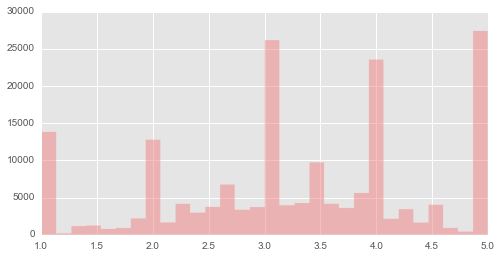

In [54]:
p = plt.hist(df_reviews.stars,bins = 30,histtype="stepfilled", color="#F08080", alpha=.5)

**Notes**: You can see the problem of a real life distribution (discontinuous because of small companies) 

In [55]:
order = [u'1 to 5 Employees',u'6 to 15 Employees',u'16 to 50 Employees',
         u'50 to 149 Employees', u'150 to 499 Employees', u'500 to 999 Employees',
         u'1000 to 5000 Employees', u'5000+ Employees','Unknown']

In [56]:
# Violin plot 
pl.figure(figsize=(20, 10))
sns.violinplot(df_reviews.stars, df_reviews['size'],order=order, color="coolwarm_r")

ValueError: to_rgb: Invalid rgb arg "coolwarm_r"
could not convert string to float: coolwarm_r

**Notes**:  You can see the discontinuity for company with few employees 

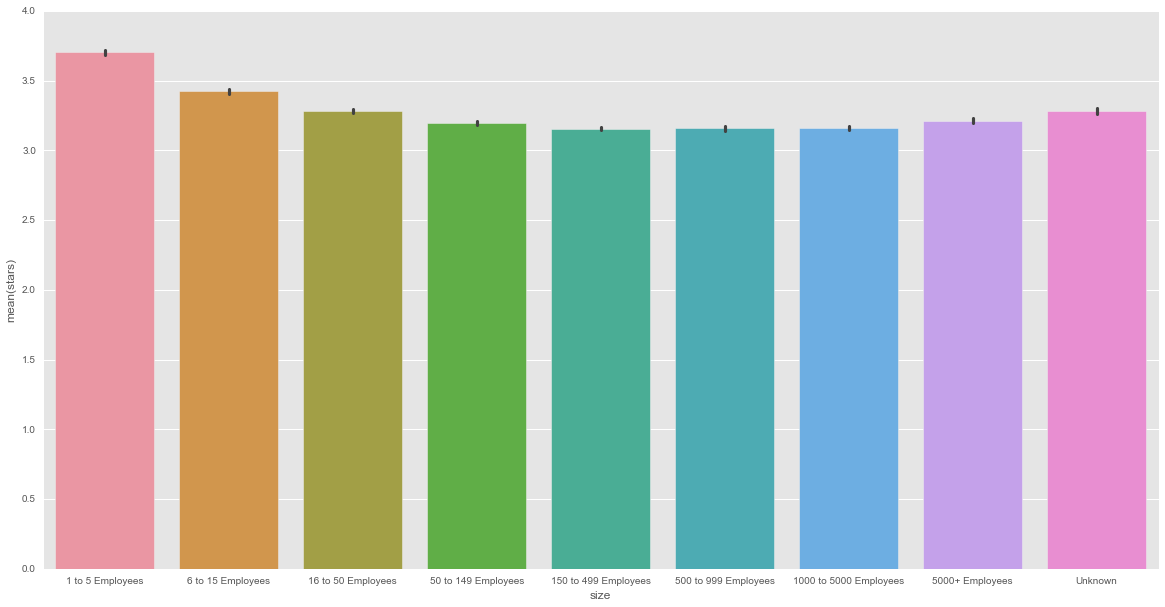

In [59]:
# Stars per size of the company
pl.figure(figsize=(20, 10))
sns.barplot("size", "stars",order = order,data = df_reviews)

In [60]:
big_companies = df_reviews.loc[df_reviews['size'] == "5000+ Employees"]

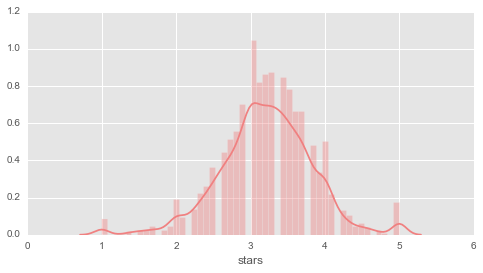

In [61]:
sns.distplot(big_companies.stars,color = '#F08080')

### Study on Missing data 

#### Some Theory 

##### Lay and Rubbin 

This is a scraped and real dataset with a lot of missing data we are going to try to respond to lay and rubin theory  

*  **MCAR** : "Missing completely at random": the missing values are completely random and doesn/t depend from observations or any other factor.
*  **MAR** :  "Missing at random":  missing values depends from the observations.
*  **NMAR** : , "Not Missing at random": missing values depends on the unobserved original data values.

##### Purpose of the study

In [ ]:
We are going to use statistic such as conditionnal expectation 

#### Using autoc DataExploration class

In [64]:
exploration = DataExploration(df_reviews)

In [65]:
exploration.nacolcount()

,Nanumber,Napercentage
website,9775,0.053920
interview_difficulty,122600,0.676276
ceo_name,90716,0.500400
nb_c_jobs,179122,0.988058
company_description,145774,0.804106
registered_employer,465,0.002565
similar_companies,9544,0.052646
acquired_by,180787,0.997242
founded,124865,0.688770
affiliated_company,178694,0.985697


In [67]:
df_test = df_reviews.copy()

In [71]:
df_test['is_na_interview_difficulty'] = df_test.interview_difficulty.isnull().astype(int)

In [122]:

def cserie(serie):
    return serie[serie].index.tolist()
cserie((df_test.dtypes == int) | (df_test.dtypes == float))

['interview_difficulty',
 'nb_c_jobs',
 'founded',
 'nb_ratings_ceo',
 'stars',
 'nb_c_reviews_detailled',
 'nb_c_interviews',
 'friend_recommend',
 'employer_id',
 'nb_c_salaries',
 'ceo_rating',
 'nb_awards_after_2000',
 'has_website',
 'is_na_interview_difficulty']

In [129]:
def plot_hist_na(df, colname):
    df_h = df.copy()
    na_name = "is_na_{}".format(colname)
    df_h[na_name] = df_h[colname].isnull().astype(int)
    measure_col = cserie((df.dtypes == int) | (df.dtypes == float))
    df_h.groupby(na_name)[measure_col].hist()
    

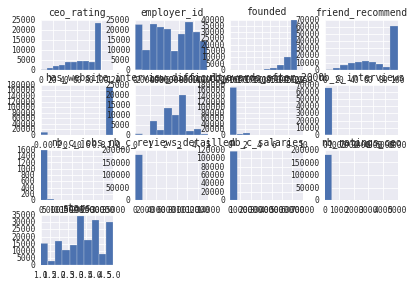

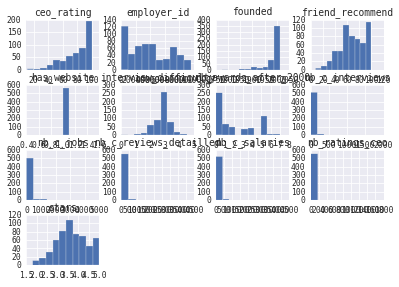

In [130]:
plot_hist_na(df_reviews,"revenue")

In [72]:
df_test.dtypes

website                        object
interview_difficulty          float64
ceo_name                       object
nb_c_jobs                     float64
company_description            object
registered_employer            object
similar_companies              object
acquired_by                    object
founded                       float64
affiliated_company             object
nb_ratings_ceo                  int64
stars                         float64
nb_c_reviews_detailled          int64
size                           object
nb_c_interviews               float64
friend_recommend              float64
url                            object
employer_id                     int64
revenue                        object
headquarters                   object
competitors                    object
company_name                   object
nb_c_salaries                 float64
awards                         object
ceo_rating                    float64
type                           object
industry    

In [73]:
df_test['is_na_interview_difficulty']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
181609    1
181610    1
181611    1
181612    1
181613    1
181614    1
181615    1
181616    1
181617    1
181618    1
181619    1
181620    0
181621    1
181622    1
181623    1
181624    0
181625    1
181626    1
181627    1
181628    1
181630    1
181631    1
181632    1
181633    1
181634    1
181635    1
181636    1
181637    1
181638    1
181648    1
Name: is_na_interview_difficulty, dtype: int64

In [115]:
df_test.groupby('is_na_interview_difficulty').describe()

ceo_rating    employer_id       founded  \
is_na_interview_difficulty                                                    
0                          count  31279.000000   58687.000000  26797.000000   
                           mean      73.162985  350825.464600   1975.331380   
                           std       25.149155  268166.243355     40.582616   
                           min        1.000000       1.000000   1616.000000   
                           25%       54.000000  115120.500000   1967.000000   
                           50%       77.000000  320247.000000   1990.000000   
                           75%      100.000000  568464.000000   2001.000000   
                           max      100.000000  982307.000000   2015.000000   
1                          count  18029.000000  122600.000000  29625.000000   
                           mean      85.580620  543785.492569   1978.486008   
                           std       23.414423  276571.324115     36.299990   
                           min        5.000000       9.000000   1601.000000   
                           25%       70.000000  317496.250000   1969.000000   
                           50%      100.000000  586726.500000   1989.000000   
                           75%      100.000000  780885.250000   2001.000000   
                           max      100.000000  982443.000000   2015.000000   

                                  friend_recommend    has_website  \
is_na_interview_difficulty                                          
0                          count      50790.000000   58687.000000   
                           mean          63.559362       0.977985   
                           std           25.589916       0.146734   
                           min            2.000000       0.000000   
                           25%           44.000000       1.000000   
                           50%           62.000000       1.000000   
                           75%           85.000000       1.000000   
                           max          100.000000       1.000000   
1                          count      75625.000000  122600.000000   
                           mean          83.448754       0.930808   
                           std           25.156986       0.253782   
                           min            5.000000       0.000000   
                           25%           63.000000       1.000000   
                           50%          100.000000       1.000000   
                           75%          100.000000       1.000000   
                           max          100.000000       1.000000   

                                  interview_difficulty  nb_awards_after_2000  \
is_na_interview_difficulty                                                     
0                          count          58687.000000          58687.000000   
                           mean               2.517479              0.284935   
                           std                0.835546              0.840877   
                           min                0.000000              0.000000   
                           25%                2.000000              0.000000   
                           50%                2.700000              0.000000   
                           75%                3.000000              0.000000   
                           max                5.000000              9.000000   
1                          count              0.000000         122600.000000   
                           mean                    NaN              0.028662   
                           std                     NaN              0.221837   
                           min                     NaN              0.000000   
                           25%                     NaN              0.000000   
                           50%                     NaN              0.000000   
                           75%                     NaN              0.000000   
          

is_na_interview_difficulty
0    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
1    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
dtype: object

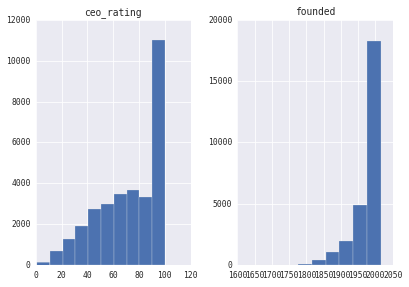

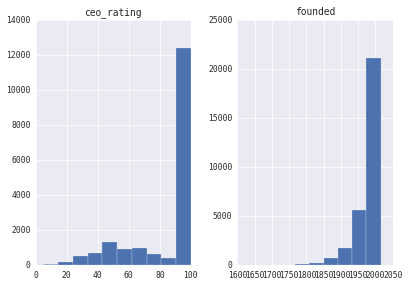

In [116]:
df_test.groupby('is_na_interview_difficulty')[['founded','ceo_rating']].hist()

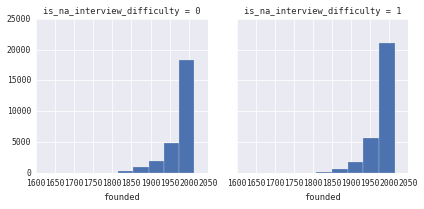

In [108]:
# g = sns.FacetGrid(tips, col="time")
# g.map(plt.hist, "tip");
g = sns.FacetGrid(data=df_test, col='is_na_interview_difficulty')
g.map(plt.hist, "founded")

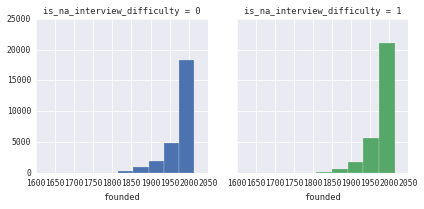

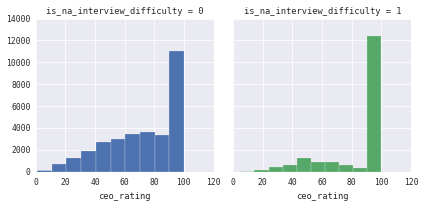

In [113]:

for col in ['founded','ceo_rating']:
    g = sns.FacetGrid(data=df_test, col='is_na_interview_difficulty',hue="is_na_interview_difficulty")
    g.map(plt.hist, col)
